In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json
import pickle as pkl
import sklearn
from sklearn.model_selection import train_test_split
from PIL import Image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras import regularizers
from sklearn.utils import class_weight

Using TensorFlow backend.
C:\Users\eric_\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\eric_\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\eric_\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\eric_\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [40]:
%cd "C:\Users\eric_\OneDrive\Documents\python workbooks\FreshAir\data"
X = pkl.load(open("x_master.p", "rb"))
Y = pkl.load(open("y_master.p", "rb"))

X.shape

C:\Users\eric_\OneDrive\Documents\python workbooks\FreshAir\data


(90487,)

In [41]:
x_bin=[]
y_bin=[]
smoking_event=0
non_smoking_event=0


for i, y in enumerate(Y):
  if X[i].shape == (160, 4):
      if y in [1,2,3]:
        y_bin.append(1)
        x_bin.append(X[i])
        smoking_event+=1
      elif y >= 20:
        y_bin.append(0)
        x_bin.append(X[i])
        non_smoking_event+=1
        
x_bin=np.array(x_bin)
y_bin=np.array(y_bin)
x_bin.shape

(83369, 160, 4)

(50, 33)


<bound method Image.show of <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=50x33 at 0x23FE0BE4828>>

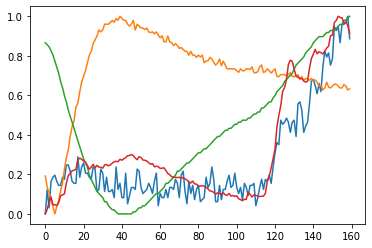

In [4]:
plt.clf()
plt.plot(x_bin[0])
plt.savefig('images\img.jpg')
img = load_img('images\img.jpg', color_mode='rgb')
img.thumbnail((50,50))
print(img.size)
img.show

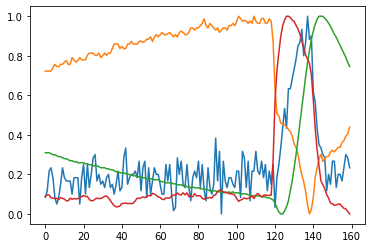

In [43]:
x_master = []
for index,array in enumerate(x_bin):
    plt.clf()
    plt.plot(array)
    plt.savefig('images\img.jpg')
    img = load_img('images\img.jpg', color_mode='rgb')
    img = img.resize((33,50))
    img_array = img_to_array(img)
    img_reshape = img_array.reshape(50,33,3)
    x_master.append(img_reshape.tolist())
    os.remove('images\img.jpg')

In [44]:
x_master = np.array(x_master)
x_master.shape

(83369, 50, 33, 3)

In [53]:
pkl.dump(x_master, open("x_master_jpg.p", "wb"))

In [54]:
pkl.dump(y_bin, open("y_master_jpg.p", "wb"))

In [2]:
%cd "C:\Users\eric_\OneDrive\Documents\python workbooks\FreshAir\data"
x_master = pkl.load(open("x_master_jpg.p", "rb"))
y_bin = pkl.load(open("y_master_jpg.p", "rb"))

C:\Users\eric_\OneDrive\Documents\python workbooks\FreshAir\data


In [3]:
x_train, x_test, y_train, y_test = train_test_split(x_master,y_bin ,test_size=0.1, random_state = 99)
x_train.shape

(75032, 50, 33, 3)

In [4]:
early_stop=EarlyStopping(monitor='val_loss', min_delta=.0001, patience=20, verbose=0, mode='auto',
                         baseline=None, restore_best_weights=False)
class_weight = {0: 1, 1: 30}

model = Sequential()
model.add(Conv2D(filters=64 ,kernel_size=(2,2),kernel_initializer = 'he_normal' ,activation='relu', 
                 input_shape=(x_train.shape[1],x_train.shape[2], x_train.shape[3])))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(.1))
model.add(Conv2D(filters=64 ,kernel_size=(2,2),kernel_initializer = 'he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(.1))
model.add(Flatten())
model.add(Dense(64,kernel_initializer = 'he_normal', activation= 'elu'))
model.add(Dense(1 ,kernel_initializer = 'he_normal', activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size=32,epochs=500,validation_split = .1, callbacks = [early_stop], 
                   class_weight = class_weight)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 67528 samples, validate on 7504 samples
Epoch 1/500
 9216/67528 [===>..........................] - ETA: 1:31 - loss: 133.8616 - acc: 0.8344

KeyboardInterrupt: 

In [10]:
results_df.sort_values(by=['recall'], ascending = False)

,Layers_norm,Layers_filter,num_filters,num_nodes,initialization,val_acc,train_acc,percision,recall,f1
4,1.0,1.0,32.0,64.0,he_normal,0.032249,0.033119,0.036704,1.000000,0.070809
11,2.0,2.0,64.0,32.0,he_normal,0.032249,0.033119,0.036704,1.000000,0.070809
15,2.0,2.0,64.0,64.0,he_normal,0.032249,0.033119,0.036704,1.000000,0.070809
6,1.0,2.0,32.0,64.0,he_normal,0.934435,0.944024,0.361076,0.921569,0.518859
7,2.0,2.0,32.0,64.0,he_normal,0.929105,0.936974,0.335731,0.915033,0.491228
9,2.0,1.0,64.0,32.0,he_normal,0.883795,0.897337,0.227911,0.901961,0.363876
5,2.0,1.0,32.0,64.0,he_normal,0.915911,0.928924,0.287831,0.888889,0.434852
3,2.0,2.0,32.0,32.0,he_normal,0.953225,0.960883,0.435691,0.885621,0.584052
8,1.0,1.0,64.0,32.0,he_normal,0.927239,0.937333,0.319512,0.856209,0.465364
12,1.0,1.0,64.0,64.0,he_normal,0.913246,0.926538,0.291435,0.856209,0.434855


In [9]:
%cd "C:\Users\eric_\OneDrive\Documents\python workbooks\FreshAir\CNN model\models_1"
results_df = pd.DataFrame()
class_weight = {0: 1, 1: 30}
NumberOFilters = [32,64]
NumberOfNodes = [32,64]
FilterLayers = [1,2]
NormLayers = [1,2]
WeightInitialization = ['he_normal']
i = 0
early_stop=EarlyStopping(monitor='val_loss', min_delta=.0001, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
for num_filters in NumberOFilters:
    for num_nodes in NumberOfNodes:
        for num_layers_filter in FilterLayers:
            for num_layers_norm in NormLayers:
                for weight_intial in WeightInitialization:
                    model = Sequential()
                    model.add(Conv2D(filters=num_filters ,kernel_size = (2,2), activation='relu', kernel_initializer = weight_intial ,input_shape=(x_train.shape[1],x_train.shape[2], x_train.shape[3])))
                    model.add(MaxPooling2D(pool_size=2))
                    model.add(Dropout(.1))
                    if num_layers_filter == 2:
                        model.add(Conv2D(filters=num_filters,kernel_initializer = weight_intial,kernel_size = (2,2) ,activation='relu'))
                        model.add(MaxPooling2D(pool_size=2))
                        model.add(Dropout(.1))
                    model.add(Flatten())
                    model.add(Dense(num_nodes,kernel_initializer = weight_intial, activation='elu'))
                    if num_layers_norm == 2:
                        model.add(Dense(num_nodes/2,kernel_initializer =weight_intial, activation= 'elu'))
                    model.add(Dense(1, kernel_initializer = weight_intial, activation='sigmoid'))
                    model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])
                    history = model.fit(x_train, y_train, batch_size=128, epochs=200, use_multiprocessing=True,validation_split=0.1, callbacks = [early_stop],class_weight = class_weight)
                    pred_y  = model.predict_classes(x_test)
                    train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
                    historydf = pd.DataFrame.from_dict(history.history)
                    recall_score = sklearn.metrics.recall_score(y_test,pred_y)
                    model.save(f"model-{i}-{recall_score:.4f}.hdf5")
                    results_df.loc[i,'Layers_norm'] = num_layers_norm
                    results_df.loc[i,'Layers_filter'] = num_layers_filter
                    results_df.loc[i,'num_filters'] = num_filters
                    results_df.loc[i,'num_nodes'] = num_nodes 
                    results_df.loc[i,'initialization'] = weight_intial 
                    results_df.loc[i,'val_acc'] = history.history['val_acc'][-1]
                    results_df.loc[i,'train_acc'] = train_acc
                    results_df.loc[i,'percision'] = sklearn.metrics.precision_score(y_test,pred_y)
                    results_df.loc[i,'recall'] = sklearn.metrics.recall_score(y_test,pred_y)
                    results_df.loc[i,'f1'] = sklearn.metrics.f1_score(y_test,pred_y)
                    print(i)
                    i = i + 1

C:\Users\eric_\OneDrive\Documents\python workbooks\FreshAir\CNN model\models_1
Train on 67528 samples, validate on 7504 samples
Epoch 1/200
67528/67528 [==============================] - 64s 941us/sample - loss: 35.4515 - acc: 0.7334 - val_loss: 3.5488 - val_acc: 0.7577
Epoch 2/200
67528/67528 [==============================] - 64s 946us/sample - loss: 1.8448 - acc: 0.8471 - val_loss: 1.2369 - val_acc: 0.8581
Epoch 3/200
67528/67528 [==============================] - 65s 958us/sample - loss: 0.9115 - acc: 0.8595 - val_loss: 1.0199 - val_acc: 0.8030
Epoch 4/200
67528/67528 [==============================] - 64s 953us/sample - loss: 0.6720 - acc: 0.8753 - val_loss: 0.7554 - val_acc: 0.8358
Epoch 5/200
67528/67528 [==============================] - 51s 750us/sample - loss: 0.5531 - acc: 0.8875 - val_loss: 0.7367 - val_acc: 0.9162
Epoch 6/200
67528/67528 [==============================] - 40s 592us/sample - loss: 0.5195 - acc: 0.8895 - val_loss: 0.6400 - val_acc: 0.8926
Epoch 7/200
67528/6

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2
Train on 67528 samples, validate on 7504 samples
Epoch 1/200
67528/67528 [==============================] - 65s 958us/sample - loss: 7.1925 - acc: 0.4742 - val_loss: 1.3504 - val_acc: 0.0338
Epoch 2/200
67528/67528 [==============================] - 64s 943us/sample - loss: 1.3912 - acc: 0.4845 - val_loss: 1.3481 - val_acc: 0.0322
Epoch 3/200
67528/67528 [==============================] - 63s 939us/sample - loss: 1.2767 - acc: 0.6034 - val_loss: 1.2580 - val_acc: 0.4486
Epoch 4/200
67528/67528 [==============================] - 60s 894us/sample - loss: 1.0323 - acc: 0.7409 - val_loss: 1.0565 - val_acc: 0.5721
Epoch 5/200
67528/67528 [==============================] - 63s 940us/sample - loss: 0.9164 - acc: 0.7712 - val_loss: 0.9067 - val_acc: 0.6772
Epoch 6/200
67528/67528 [==============================] - 61s 898us/sample - loss: 0.8511 - acc: 0.7856 - val_loss: 0.9050 - val_acc: 0.6642
Epoch 7/200
67528/67528 [==============================] - 63s 935us/sample - loss: 0.8012 - acc:

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10
Train on 67528 samples, validate on 7504 samples
Epoch 1/200
67528/67528 [==============================] - 121s 2ms/sample - loss: 10.9274 - acc: 0.5253 - val_loss: 1.3422 - val_acc: 0.0322
Epoch 2/200
67528/67528 [==============================] - 124s 2ms/sample - loss: 1.4034 - acc: 0.5032 - val_loss: 1.3437 - val_acc: 0.0322
Epoch 3/200
67528/67528 [==============================] - 120s 2ms/sample - loss: 1.3694 - acc: 0.1430 - val_loss: 1.3416 - val_acc: 0.8341
Epoch 4/200
67528/67528 [==============================] - 120s 2ms/sample - loss: 1.3609 - acc: 0.2199 - val_loss: 1.3769 - val_acc: 0.7509
Epoch 5/200
67528/67528 [==============================] - 120s 2ms/sample - loss: 1.3610 - acc: 0.2675 - val_loss: 1.3744 - val_acc: 0.6250
Epoch 6/200
67528/67528 [==============================] - 120s 2ms/sample - loss: 1.3605 - acc: 0.2612 - val_loss: 1.3810 - val_acc: 0.7656
Epoch 7/200
67528/67528 [==============================] - 120s 2ms/sample - loss: 1.3612 - acc: 0.32

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


14
Train on 67528 samples, validate on 7504 samples
Epoch 1/200
67528/67528 [==============================] - 126s 2ms/sample - loss: 22.8966 - acc: 0.4811 - val_loss: 1.3540 - val_acc: 0.0322
Epoch 2/200
67528/67528 [==============================] - 119s 2ms/sample - loss: 1.3978 - acc: 0.2387 - val_loss: 1.3414 - val_acc: 0.0322
Epoch 3/200
67528/67528 [==============================] - 119s 2ms/sample - loss: 1.3725 - acc: 0.3730 - val_loss: 1.3415 - val_acc: 0.0322
Epoch 4/200
67528/67528 [==============================] - 118s 2ms/sample - loss: 1.3654 - acc: 0.3879 - val_loss: 1.3415 - val_acc: 0.9678
Epoch 5/200
67528/67528 [==============================] - 119s 2ms/sample - loss: 1.3638 - acc: 0.3349 - val_loss: 1.3415 - val_acc: 0.9678
Epoch 6/200
67528/67528 [==============================] - 119s 2ms/sample - loss: 1.3625 - acc: 0.3510 - val_loss: 1.3417 - val_acc: 0.0322
Epoch 7/200
67528/67528 [==============================] - 119s 2ms/sample - loss: 1.3647 - acc: 0.25

In [50]:
results_df

,Layers_norm,Layers_filter,num_filters,num_nodes,initialization,val_acc,train_acc,percision,recall,f1
0,1.0,1.0,32.0,32.0,he_uniform,0.967751,0.966881,0.000000,0.000000,0.000000
1,1.0,1.0,32.0,32.0,he_normal,0.967751,0.966881,0.000000,0.000000,0.000000
2,2.0,1.0,32.0,32.0,he_uniform,0.803172,0.811067,0.150515,0.954248,0.260018
3,2.0,1.0,32.0,32.0,he_normal,0.967751,0.966881,0.000000,0.000000,0.000000
4,1.0,2.0,32.0,32.0,he_uniform,0.032249,0.033119,0.036704,1.000000,0.070809
